In [40]:
#notes since latest update
#Edited model to use 0,1 for target class
#recall figure is now being correctly calculated and believe but not sure that this may have been down to the using of 1,2 for variables. Need to investigate the sklearn model syntax as to why this may be

#Next steps is to actaully dive into the data now that the syntax is working
#I built the syntax first as i had never used python before and i wanted a working syntax for the model before i starting analysing and changing things inside the model so i could see outcomes as i worked.

In [51]:
#importing
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.covariance import EllipticEnvelope
from imblearn.over_sampling import SMOTE
from collections import Counter
%matplotlib inline

In [2]:
#import the dataset provided german.data into the workspace and apply relevent headers for easier understanding
data = pd.read_csv('german.data', header =None, sep=' ', names=["Status", "Duration_month", "Credit_History", "Purpose", "Credit_Amount", "Savings_accountBonds", "Present_employment_since", "Installment_rate_per_dis_income", "Personal_status_sex", "other_debtors_guarantors", "Present_residence_since", "Property", "Age_years", "other_installment_plans", "housing", "number_existing_credits_atbank", "Job", "no_of_people_being_liable_to_provide_maintenance_for", "telephone", "foreign_worker", "Prediction"])
print(data)
y = data.Prediction #define the target variable as y


    Status  Duration_month Credit_History Purpose  Credit_Amount  \
0      A11               6            A34     A43           1169   
1      A12              48            A32     A43           5951   
2      A14              12            A34     A46           2096   
3      A11              42            A32     A42           7882   
4      A11              24            A33     A40           4870   
5      A14              36            A32     A46           9055   
6      A14              24            A32     A42           2835   
7      A12              36            A32     A41           6948   
8      A14              12            A32     A43           3059   
9      A12              30            A34     A40           5234   
10     A12              12            A32     A40           1295   
11     A11              48            A32     A49           4308   
12     A12              12            A32     A43           1567   
13     A11              24            A34     A4

In [3]:
#convert the column of good or bad credit into 0,1 instead of 1,2 as i prefer to work in this format
data['Prediction'] = data['Prediction'].map({1: 0, 2: 1})

In [4]:
#quick check of first 5 records to confirm correct entry
data.head()

,Status,Duration_month,Credit_History,Purpose,Credit_Amount,Savings_accountBonds,Present_employment_since,Installment_rate_per_dis_income,Personal_status_sex,other_debtors_guarantors,...,Property,Age_years,other_installment_plans,housing,number_existing_credits_atbank,Job,no_of_people_being_liable_to_provide_maintenance_for,telephone,foreign_worker,Prediction
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


In [5]:
data["Prediction"].value_counts()
#Classification Variable used in training and prediction

0    700
1    300
Name: Prediction, dtype: int64

In [6]:
data.isnull().any()
#checks the dataframe for null values or empty values and returns a boolean value of true 
#if they exist or false if there are no nulls in the attribute

Status                                                  False
Duration_month                                          False
Credit_History                                          False
Purpose                                                 False
Credit_Amount                                           False
Savings_accountBonds                                    False
Present_employment_since                                False
Installment_rate_per_dis_income                         False
Personal_status_sex                                     False
other_debtors_guarantors                                False
Present_residence_since                                 False
Property                                                False
Age_years                                               False
other_installment_plans                                 False
housing                                                 False
number_existing_credits_atbank                          False
Job     

In [7]:
data.isnull().sum()
#checks the dataframe for null values or empty values and if there are any then counts how many per attribute/feature

Status                                                  0
Duration_month                                          0
Credit_History                                          0
Purpose                                                 0
Credit_Amount                                           0
Savings_accountBonds                                    0
Present_employment_since                                0
Installment_rate_per_dis_income                         0
Personal_status_sex                                     0
other_debtors_guarantors                                0
Present_residence_since                                 0
Property                                                0
Age_years                                               0
other_installment_plans                                 0
housing                                                 0
number_existing_credits_atbank                          0
Job                                                     0
no_of_people_b

In [8]:
#It appears there are no missing values in the dataset as in null values, 
#a secondary check will be conducted using a count on each feature to check for 1000 entires
data.count()

Status                                                  1000
Duration_month                                          1000
Credit_History                                          1000
Purpose                                                 1000
Credit_Amount                                           1000
Savings_accountBonds                                    1000
Present_employment_since                                1000
Installment_rate_per_dis_income                         1000
Personal_status_sex                                     1000
other_debtors_guarantors                                1000
Present_residence_since                                 1000
Property                                                1000
Age_years                                               1000
other_installment_plans                                 1000
housing                                                 1000
number_existing_credits_atbank                          1000
Job                     

In [10]:
#Check for incorrect categorical variables that are outside scope of data dictionary
#As we were asked to find missing values and it appears that their are none, another thing to check is that all the features
#have no anomalys or incorrect data entries.

#WIP

In [9]:
#WIP Investigate tomorrow
print(data.corr())

                                                    Duration_month  \
Duration_month                                            1.000000   
Credit_Amount                                             0.624984   
Installment_rate_per_dis_income                           0.074749   
Present_residence_since                                   0.034067   
Age_years                                                -0.036136   
number_existing_credits_atbank                           -0.011284   
no_of_people_being_liable_to_provide_maintenanc...       -0.023834   
Prediction                                                0.214927   

                                                    Credit_Amount  \
Duration_month                                           0.624984   
Credit_Amount                                            1.000000   
Installment_rate_per_dis_income                         -0.271316   
Present_residence_since                                  0.028926   
Age_years               

In [10]:
#WIP 
print(data.cov())

                                                    Duration_month  \
Duration_month                                          145.415006   
Credit_Amount                                         21273.749776   
Installment_rate_per_dis_income                           1.008389   
Present_residence_since                                   0.453418   
Age_years                                                -4.956995   
number_existing_credits_atbank                           -0.078600   
no_of_people_being_liable_to_provide_maintenanc...       -0.104069   
Prediction                                                1.188288   

                                                    Credit_Amount  \
Duration_month                                       2.127375e+04   
Credit_Amount                                        7.967843e+06   
Installment_rate_per_dis_income                     -8.567708e+02   
Present_residence_since                              9.012011e+01   
Age_years               

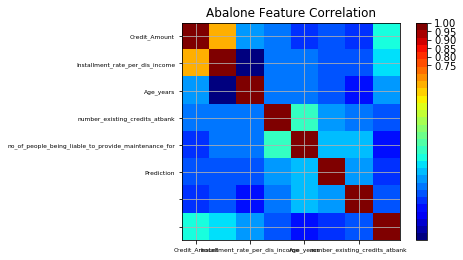

In [79]:
#WIP Investigate tomorrow
num_variables = ["Duration_month", "Credit_Amount", "Installment_rate_per_dis_income", "Age_years", "number_existing_credits_atbank", "no_of_people_being_liable_to_provide_maintenance_for", "Prediction"]

data_num = data[num_variables]
def correlation_matrix(data_num):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(data.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=["Duration_month", "Credit_Amount", "Installment_rate_per_dis_income", "Age_years", "number_existing_credits_atbank", "no_of_people_being_liable_to_provide_maintenance_for", "Prediction"]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(data_num)

In [12]:
#some very large outliers in Credit Amount, Duration_months and Age
data.agg([pd.np.min, pd.np.max, pd.np.mean, pd.np.median])

,Status,Duration_month,Credit_History,Purpose,Credit_Amount,Savings_accountBonds,Present_employment_since,Installment_rate_per_dis_income,Personal_status_sex,other_debtors_guarantors,...,Property,Age_years,other_installment_plans,housing,number_existing_credits_atbank,Job,no_of_people_being_liable_to_provide_maintenance_for,telephone,foreign_worker,Prediction
amax,A14,72.000,A34,A49,18424.000,A65,A75,4.000,A94,A103,...,A124,75.000,A143,A153,4.000,A174,2.000,A192,A202,1.0
amin,A11,4.000,A30,A40,250.000,A61,A71,1.000,A91,A101,...,A121,19.000,A141,A151,1.000,A171,1.000,A191,A201,0.0
mean,NaN,20.903,NaN,NaN,3271.258,NaN,NaN,2.973,NaN,NaN,...,NaN,35.546,NaN,NaN,1.407,NaN,1.155,NaN,NaN,0.3
median,NaN,18.000,NaN,NaN,2319.500,NaN,NaN,3.000,NaN,NaN,...,NaN,33.000,NaN,NaN,1.000,NaN,1.000,NaN,NaN,0.0


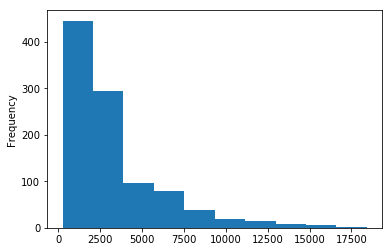

In [99]:
#not working yet work on
data['Credit_Amount'].plot(kind='hist')

#Gamma distrobution??? investigate methods to remove outliers of gammma distro. Side note mathamatically it might make sence to remove these outliers but does it logically make sence to remove them?

In [61]:
#ignore for now
outlier_frac = 0.035
dataell = EllipticEnvelope(contamination=outlier_frac)
dataell.fit(data_encoded)

C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:622: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


EllipticEnvelope(assume_centered=False, contamination=0.035,
         random_state=None, store_precision=True, support_fraction=None)

In [52]:
#As above the dataset is imbalanced in a ratio of 70-30 positive to negative to correct this imbalance oversampling will be done
#Before oversampling can occur the data set will be split into the Training-Test-Validation set
#This is to avoid bleeding information from the tert/validation set into the training of the model and potentially overfitting the model



In [53]:
#Next steps
#Evaulate the data and determine which features to try in first iteration of model.

In [14]:
#Create a data subset that has only the features determined to be of use
#first iteration for testing purposes data analysis still needs to be done
model_variables = ["Status", "Duration_month", "Credit_History", "Purpose", "Credit_Amount", "Savings_accountBonds", "Present_employment_since", "Installment_rate_per_dis_income", "Personal_status_sex", "other_debtors_guarantors", "Present_residence_since", "Property", "Age_years", "other_installment_plans", "housing", "number_existing_credits_atbank", "Job", "no_of_people_being_liable_to_provide_maintenance_for", "telephone", "foreign_worker", "Prediction"]

data_relevent = data[model_variables]

In [15]:
#encode categorical features as binary
data_encoded = pd.get_dummies(data_relevent)
data_encoded.head()

,Duration_month,Credit_Amount,Installment_rate_per_dis_income,Present_residence_since,Age_years,number_existing_credits_atbank,no_of_people_being_liable_to_provide_maintenance_for,Prediction,Status_A11,Status_A12,...,housing_A152,housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,1,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0


In [25]:
# create training and testing vars
training_features, test_features, \
training_target, test_target, = train_test_split(data_encoded.drop(['Prediction'], axis=1),
                                               data_encoded['Prediction'],
                                               test_size = .2,
                                               random_state=12)

In [26]:
#Oversampling only the training data
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target, test_size=0.2, random_state=12)


In [37]:
#More reading to be done on smote as i managed to get it to work to rebalance the data but their are some problems. 
sm = SMOTE(ratio = 'minority', random_state=12, kind='regular')
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_train_res)))



Resampled dataset shape Counter({0: 456, 1: 456})


In [41]:
#attempting to get the syntax correct for a doing a random forest, not actually working with correct logic yet
clf_rf = RandomForestClassifier(n_estimators=32, random_state=12)
clf_rf.fit(x_train_res, y_train_res)
#experimenting with optimal n_estimators 31 was foundt be the best number on test and validation set with highest accuracy while maintaining higest possible recall so far


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [46]:
#Rough test using all variables potentially have a few variables around the wrong way need to look into. 
#Basically now i have learnt as iv never used python before i plan to dive more into the actually data and see how i
#improve my model.
print ('Validation Results')
print (('Accuracy: '), accuracy_score(y_val, clf_rf.predict(x_val)))
print (('Recall  : '), recall_score(y_val, clf_rf.predict(x_val)))
print ('\nTest Results')
print (('Accuracy: '), clf_rf.score(test_features, test_target))
print (('Recall  : '), recall_score(test_target, clf_rf.predict(test_features)))

Validation Results
Accuracy:  0.75
Recall  :  0.413043478261

Test Results
Accuracy:  0.715
Recall  :  0.4


In [47]:
#attempting to make a confusion matrix on valadation data
# TN FP
# FN TP
from sklearn.metrics import confusion_matrix
y_true = y_val
y_pred = clf_rf.predict(x_val)
confusion_matrix(y_true, y_pred)

array([[101,  13],
       [ 27,  19]], dtype=int64)

In [48]:
#attempting to make a confusion matrix on test data
# TN FP
# FN TP
from sklearn.metrics import confusion_matrix
y_true = test_target
y_pred = clf_rf.predict(test_features)
confusion_matrix(y_true, y_pred)

array([[115,  15],
       [ 42,  28]], dtype=int64)

NEXT STEPS

Now the initial model has been built and some rough understanding of the model has been conducted, time to have a real think about the data and what we are trying to acheive through the model

First of all not all the features will have any real outcome on the prediction aka they are not predictors or in other words no real impact on the outcome of wether or not they have any influence on a customers credability.

Below are the features that i believe will actually have an impact in the model on a logical level. (of course we could use a analysis on the orignal rough model for feature imporatance however this could be misleading as it may have a high importance due to the models construction but not logically have any actual importance.


WIP

